#### Probability Scoring Methods

- (Wiki) In decision theory, a **score function**, or **scoring rule**, measures the accuracy of probabilistic predictions. It is applicable to tasks in which predictions must assign probabilities to a set of mutually exclusive outcomes. The set of possible outcomes can be either binary or categorical in nature, and the probabilities assigned to this set of outcomes must sum to one. A score can be thought of as either a measure of the "calibration".

- Predicting probabilities instead of class labels for a classification problem can provide additional nuance and uncertainty for the predictions.
- More sophisticated metrics to be used to interpret and evaluate the predicted probabilities. 
- Score function examples:
    - **Log loss score**: heavily penalizes predicted probabilities far away from their expected value
    - **Brier score**: gentler than log loss but still penalizes proportional to the distance from the expected value
    - **AUROC**: summarizes the likelihood of the model predicting a higher probability for true positive

In [1]:
from sklearn.metrics import log_loss

In [2]:
import matplotlib.pyplot as plt
import numpy as np

- Log loss = $-\sum_{c=1}^{M}y_{o,c} \log (p_{o,c})$

In [3]:
pred_probs = [x for x in np.linspace(0, 1, num=100)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss(y_true=[0], y_pred=[x], labels=[0,1]) for x in pred_probs]

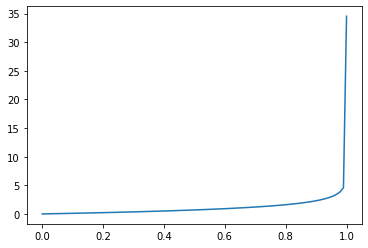

In [4]:
plt.plot(pred_probs, losses_0, label='true=0')

In [5]:
actual_labels = ["bam", "ham", "spam"]

In [6]:
log_loss(actual_labels,  [[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # 모두 정답

2.1094237467877998e-15

In [7]:
log_loss(actual_labels,  [[0, 1, 0], [1, 0, 0], [0, 1, 0]]) # 완벽히 틀린 경우

34.538776394910684

In [8]:
# 적당히 틀린 경우. accuracy=1.0 이지만. Probability Score는 0이 아님
log_loss(actual_labels,  [[0.8, 0, 0.2], [0.1, 0.9, 0], [0, 0.1, 0.9]]) 

0.14462152754328852

#### Brier Score

$$BS = \frac{1}{N} \sum_{t=1}^N(f_t - o_t)^2  $$
where $f_{t}$ is the probability that was predicted, $o_{t}$ the actual label.

In [9]:
from sklearn.metrics import brier_score_loss

pred_probs = [x for x in np.linspace(0, 1, num=100)]
# evaluate predictions for a 0 true value
losses_1 = [brier_score_loss(y_true=[0], y_prob=[x], pos_label=[1]) for x in pred_probs]

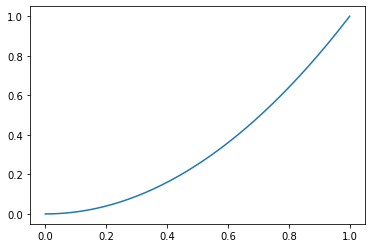

In [10]:
plt.plot(pred_probs, losses_1)

#### ROC AUC Score

In [11]:
# roc curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5)

In [12]:
print(trainX.shape)
print(trainy.shape)

(500, 20)
(500,)


In [13]:
print(trainX[0])
print('label:', trainy[0])

[ 0.25768029 -0.85307933 -0.47141487 -0.34792433 -1.08893164  1.37615763
  0.20328229 -0.14082524  0.41744994 -2.78895795  1.02962973 -0.86127274
 -0.50116798  0.90993683 -0.73988912  0.95177419  0.60332025 -0.98558566
  1.41150786  0.16279122]
label: 0


In [14]:
model = LogisticRegression()
model.fit(trainX, trainy)

LogisticRegression()

In [15]:
probs = model.predict_proba(testX)

In [16]:
probs.shape

(500, 2)

In [17]:
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

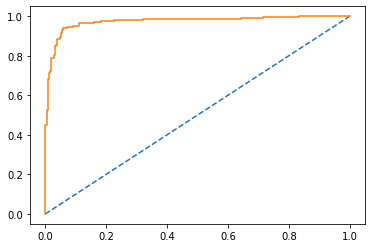

In [18]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr)
pyplot.show()